## Entanglement

In [1]:
%pip install qiskit
%pip install quantum_simulation_recipe
%pip install matplotlib
%pip install numpy
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, random_clifford, Pauli, Operator, partial_trace, entropy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from quantum_simulation_recipe.spin import Nearest_Neighbour_1d
from quantum_simulation_recipe.trotter import *
from quantum_simulation_recipe.bounds import norm, tight_bound, commutator
from quantum_simulation_recipe.plot_config import *
from time import sleep
from tqdm import tqdm

def partEntropy(states, m):
    entro = []
    for i, state in enumerate(states):
        st = partial_trace(state, list(range(m)))
        entro.append(entropy(st, 2))
    return entro
    
def GenerateBootstrapSample(data):
    return np.random.choice(data, len(data), replace=True)

depth = 40
BootstrapScale=10000
# Load data for both plots
# Atypical data
s_anti = np.load("./vardata/antientstates.npy")
states_anti = []
for i, st in enumerate(s_anti):
    state = Statevector(st)
    states_anti.append(state)

moments_anti = []
AntiwithCI=np.zeros((2,len(states_anti)))
for j, st0 in enumerate(states_anti):
    bootstrap_anti = []
    errors = np.load(f"./vardata/antient_{j}.npy")
    errors = np.power(errors, 2)*np.power(10,8)
    variance  = np.var(errors)
    moments_anti.append(variance)
    # Bootstrap to Give a confidence interval
    i=0
    while i < BootstrapScale:
        sample = GenerateBootstrapSample(errors)
        TestStat = np.var(sample)-variance
        bootstrap_anti.append(TestStat)
        i+=1
    quantiles = [0.025,0.975]
    lower, upper = np.quantile(bootstrap_anti, quantiles)
    AntiwithCI[1,j]=-lower
    AntiwithCI[0,j]=upper
print(AntiwithCI)
# Typical data
s_ent = np.load("./vardata/entstates.npy")
states_ent = []
for i, st in enumerate(s_ent):
    state = Statevector(st)
    states_ent.append(state)

moments_ent = []
EntwithCI=np.zeros((2,len(states_ent)))
for j, st0 in enumerate(states_ent):
    bootstrap_ent=[]
    errors = np.load(f"./vardata/ent_{j}.npy")
    errors = np.power(errors, 2)*np.power(10,8)
    variance  = np.var(errors)
    moments_ent.append(variance)
    # Bootstrap to Give a confidence interval
    i=0
    while i < BootstrapScale:
        sample = GenerateBootstrapSample(errors)
        TestStat = np.var(sample)-variance
        bootstrap_ent.append(TestStat)
        i+=1
    quantiles = [0.025,0.975]
    lower, upper = np.quantile(bootstrap_ent, quantiles)
    EntwithCI[1,j]=-lower
    EntwithCI[0,j]=upper
print(EntwithCI)


[[0.145806 0.089077 0.022222 0.042349 0.042257 0.04913  0.028614 0.035836
  0.035659 0.047495 0.050267 0.040742 0.016611 0.032604 0.054493 0.030478
  0.043884 0.030741 0.081385 0.027099 0.051548 0.033745 0.034899 0.054604
  0.022945 0.044342 0.037811 0.048891 0.040214 0.032083 0.025564 0.061793
  0.061925 0.023417 0.050066 0.028357 0.032542 0.04774  0.023692 0.026959
  0.083703]
 [0.168782 0.09633  0.023445 0.045617 0.044857 0.05212  0.029531 0.036627
  0.040426 0.051344 0.051701 0.042494 0.016759 0.033237 0.055666 0.031692
  0.047308 0.031584 0.085517 0.027625 0.053921 0.036018 0.036323 0.059794
  0.024158 0.04909  0.039388 0.05253  0.042124 0.034842 0.025479 0.066992
  0.06375  0.023971 0.053769 0.029262 0.033278 0.051348 0.023263 0.027263
  0.104643]]
[[0.162804 0.054765 0.008849 0.008293 0.00841  0.007232 0.009263 0.009506
  0.008119 0.009379 0.014774 0.013112 0.008027 0.010252 0.009164 0.009575
  0.008222 0.00901  0.007876 0.006433 0.010054 0.007039 0.006403 0.011062
  0.008693 0.

In [2]:

# Plot settings
fontprops = {'size': 28}
ls = 28
ws = 28
# plt.rcParams['text.usetex']=True
# plt.rc('font', family='sans-serif')
#plt.rcParams["font.family"] = ["Bitstream Vera Serif"]
#print(plt.rcParams['font.serif'])
#plt.rcParams['font.family']='DejaVu Serif'
set_fontsize(linewidth=3)


# colors = ['#E4A031', '#D68438', '#C76B60', '#B55384', '#7C4D77', '#474769', 
#           '#B2B6C1', '#73A5A2', '#4C7780', '#F6E2C1', '#F3DBC1', '#D6E2E2', 
#           '#F0EFED', '#E3BBED', '#26445E']
colors = [ '#7C4D77','#D68438', '#C76B60', '#B55384', '#E4A031', '#474769', 
          '#B2B6C1', '#73A5A2', "#9BC0C7", '#F6E2C1', '#F3DBC1', '#D6E2E2', 
          '#F0EFED', '#26445E','#E3BBED']
x = list(range(depth + 1))
# print(mpl.matplotlib_fname())
# print(mpl.get_cachedir())


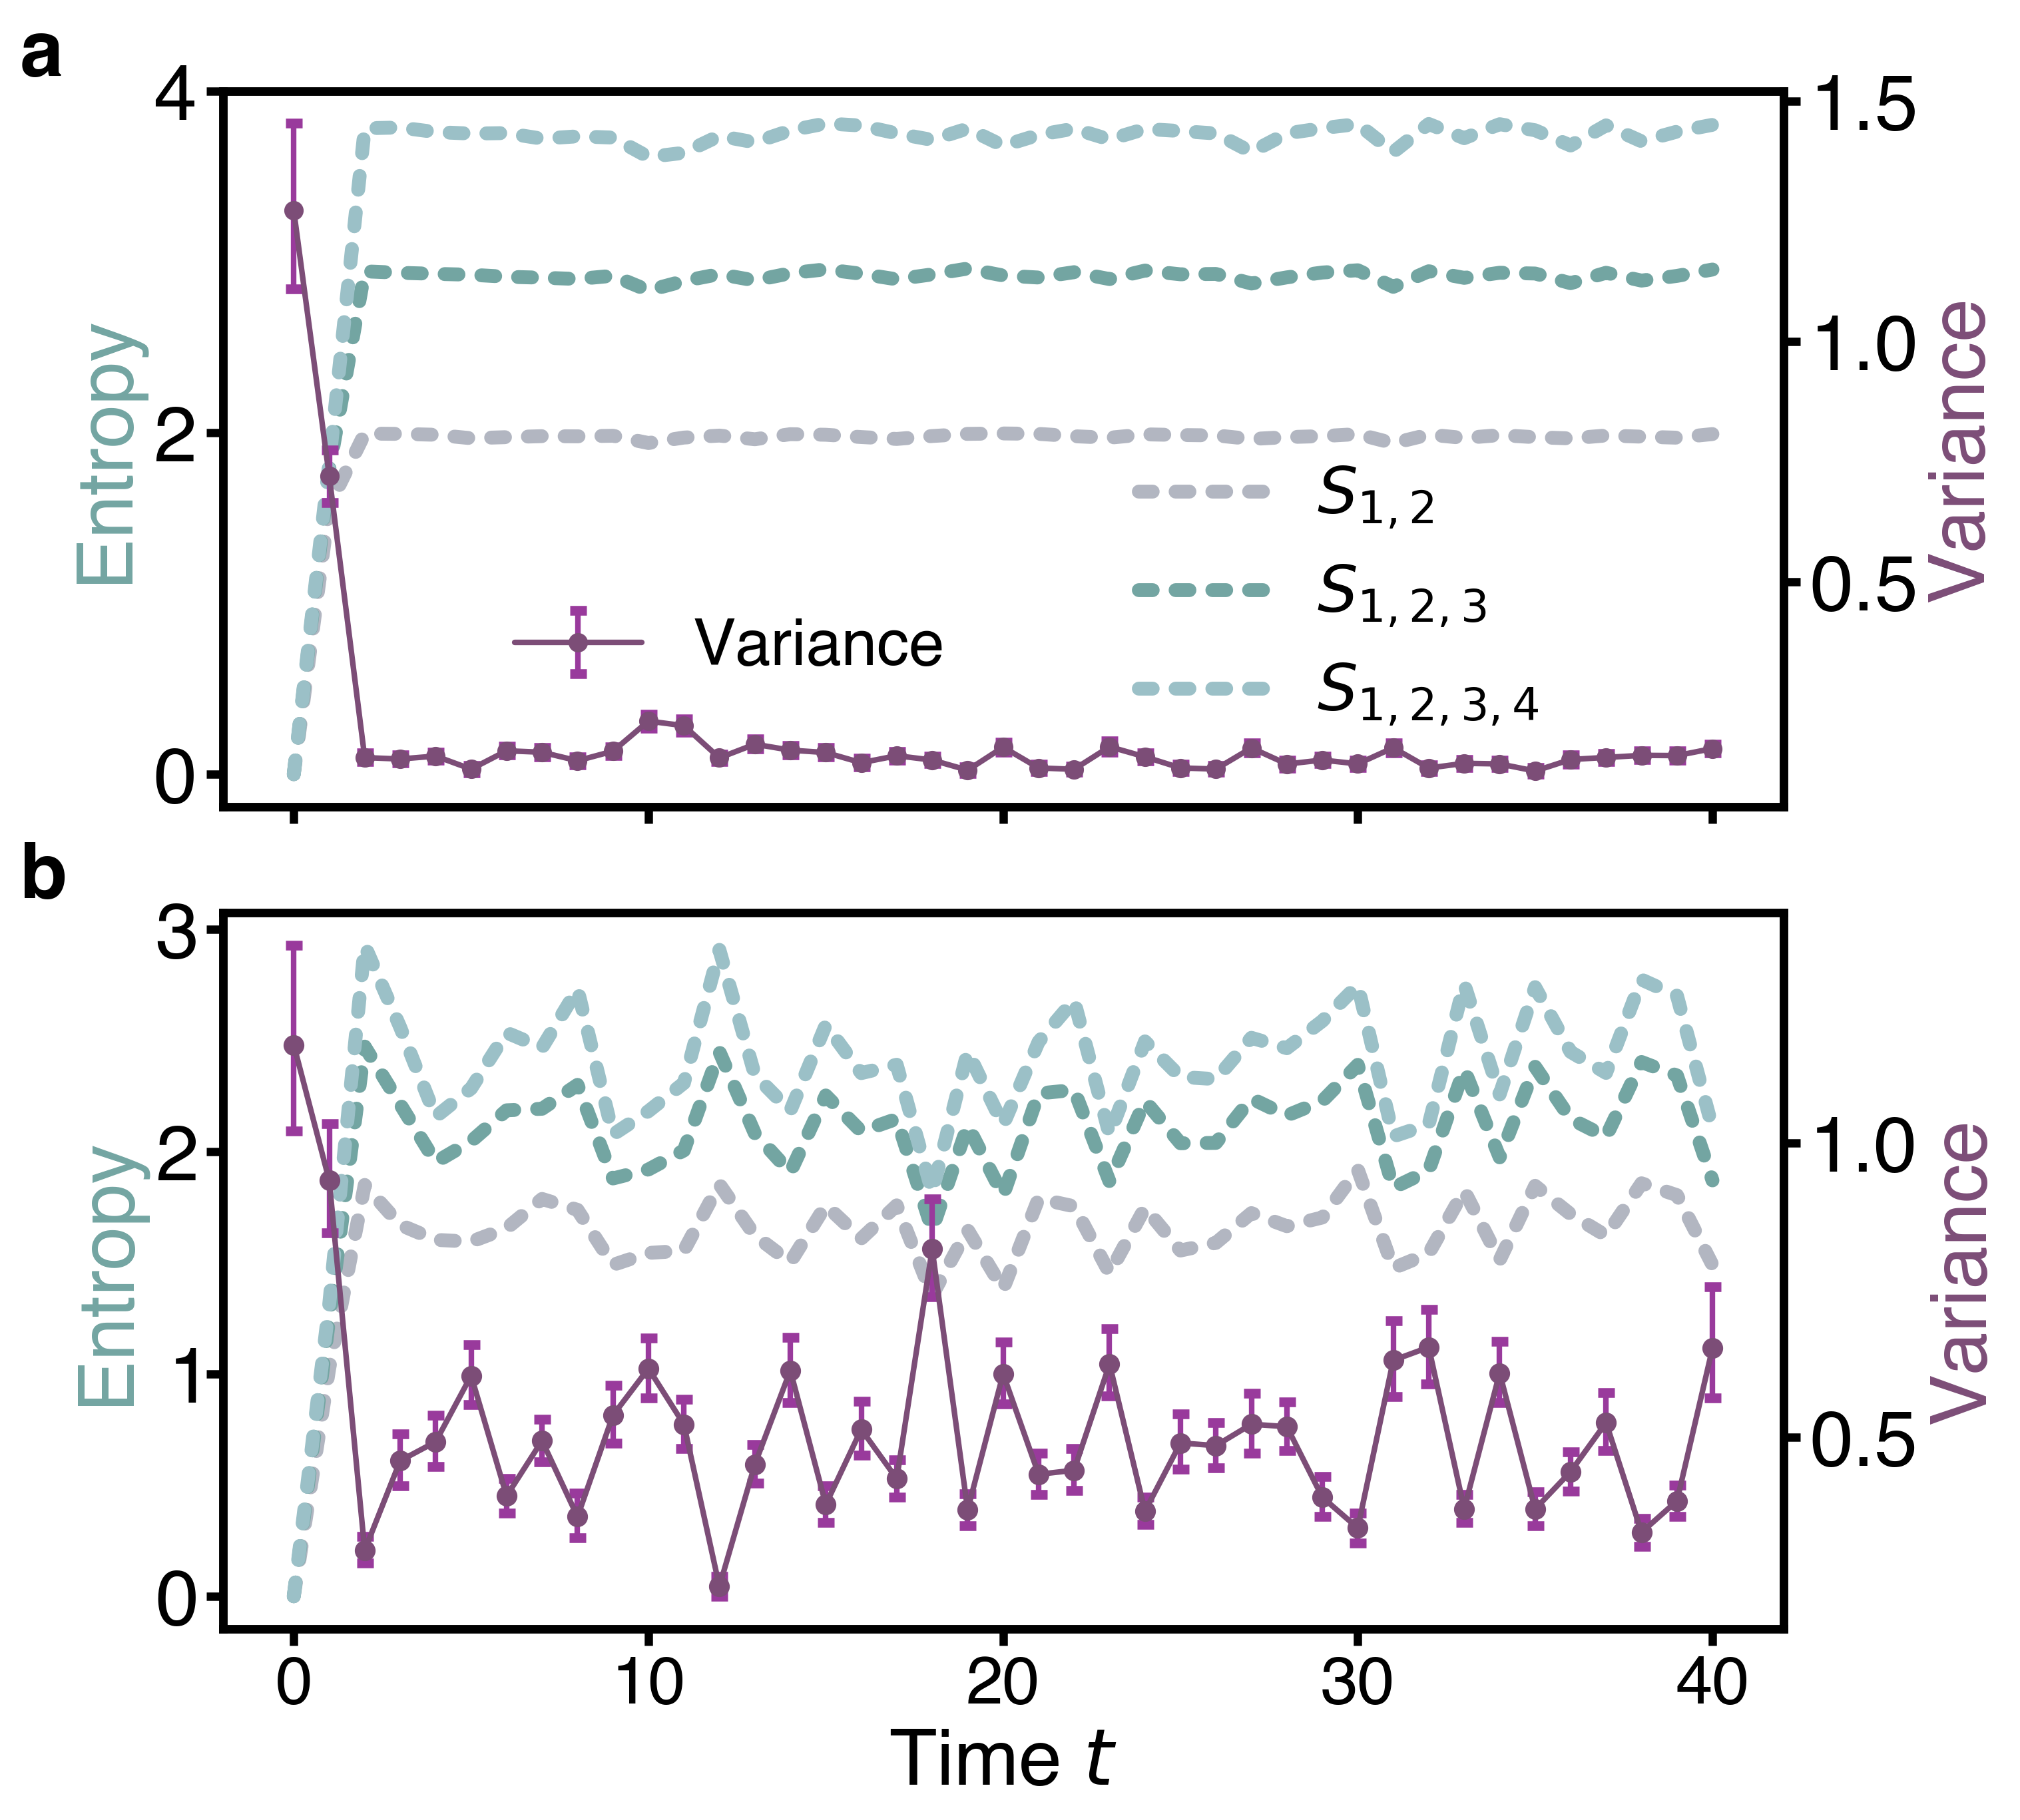

In [4]:
# Create figure with two subplots side by side
fig, (ax1_right, ax1_left) = plt.subplots(2, 1, figsize=(10, 9), layout='constrained',sharex=True)

# ========== LEFT PLOT: ATYPICAL ==========
ax1_left.set_ylabel(r"Entropy", fontdict=fontprops, color=colors[7])
ax1_left.set_xlabel(r"Time $t$", fontdict=fontprops)
ax1_left.ticklabel_format(style='sci', axis='y', scilimits=(-2, 2),useMathText=True)
part = [2, 3, 4]
labels = [rf'$S_{{1,2}}$', rf'$S_{{1,2,3}}$', rf'$S_{{1,2,3,4}}$']
for j, m in enumerate(part):
    y = np.load(f"./vardata/part{m}atypical.npy")
    ax1_left.plot(x, y, label=labels[j], color=colors[m+4], 
                  linestyle="dotted", linewidth=5)
ax1_left.tick_params(axis='y', which='major', labelsize=ls)

ax2_left = ax1_left.twinx()

ax2_left.set_ylabel(r"Variance", fontdict=fontprops, color=colors[0])

ax2_left.tick_params(axis='y', labelsize=ls, which='both')
ax2_left.tick_params(axis='x', labelsize=ls)
offset_text_left = ax2_left.yaxis.get_offset_text()
offset_text_left.set_fontsize(ls)
# ax1_left.set_title(r"(a) Atypical", fontdict=fontprops, pad=20)
# ax1_left.plot(x, moments_anti, label=rf'$\text{{Var}}[s_E(\psi)]$', color=colors[0], 
#               marker="o", markerfacecolor=colors[0], markeredgecolor=colors[4], 
#               markersize=6, linestyle="-", markeredgewidth=3, linewidth=4)
ax2_left.errorbar(x,moments_anti,yerr=np.array(AntiwithCI), fmt='o',linestyle='-',ecolor="#993A9C", elinewidth=2, 
                  capsize=3,linewidth=2,color=colors[0],markersize=4, markerfacecolor=colors[0],markeredgecolor=colors[0])




# ========== RIGHT PLOT: TYPICAL ==========
#ax1_right.set_xlabel(r"Time $t$", fontdict=fontprops)
# move the ylabel to the top of the axis
ax1_right.set_ylabel(r"Entropy", fontdict=fontprops, color=colors[7])
# ax2_right.set_ylabel(r"Entropy", fontdict=fontprops, color=colors[8], rotation=0, ha='left', va='bottom')
# ax2_right.yaxis.set_label_coords(0.75, 1.02) 
# ax2_left.set_ylabel(r"Entropy", fontdict=fontprops, color=colors[8], rotation=0, ha='left', va='bottom')
# ax2_left.yaxis.set_label_coords(0.75, 1.02) 
for j, m in enumerate(part):
    y = np.load(f"./vardata/part{m}typical.npy")
    ax1_right.plot(x, y, label=labels[j], color=colors[m+4], 
                   linestyle="dotted", linewidth=5)
ax1_right.tick_params(axis='y', which='major', labelsize=ls)

ax2_right = ax1_right.twinx()
ax2_right.set_ylabel(r"Variance", fontdict=fontprops, color=colors[0])
# ax2_right.plot(x, moments_ent, label=rf'$\text{{Var}}[s_E(\psi)]$', color=colors[0], 
#                marker="o", markerfacecolor=colors[0], markeredgecolor=colors[4], 
#                markersize=10, linestyle="-", markeredgewidth=3, linewidth=5)
ax2_right.errorbar(x,moments_ent,yerr=np.array(EntwithCI), fmt='o',linestyle='-',ecolor="#993A9C", elinewidth=2, 
                  capsize=3,linewidth=2,color=colors[0],markersize=3.5, markerfacecolor=colors[0],markeredgecolor=colors[0],label=r"Variance")
ax2_right.ticklabel_format(style='sci', axis='y', scilimits=(-2, 2),useMathText=True)
ax2_right.tick_params(axis='y', labelsize=ls, which='both')
ax2_right.tick_params(axis='x', labelsize=ls)
offset_text_right = ax2_right.yaxis.get_offset_text()
offset_text_right.set_fontsize(ls)
# ax1_right.set_title(r"(b) Typical", fontdict=fontprops, pad=20)


# Optional: Add a shared legend
# lines1, labels1 = ax1_left.get_legend_handles_labels()
# lines2, labels2 = ax2_left.get_legend_handles_labels()
# fig.legend(lines1 + lines2, labels1 + labels2, loc='upper center', 
#            bbox_to_anchor=(0.3, 0.56), fontsize=22)
ax2_right.legend(loc='lower left', bbox_to_anchor=(0.15, 0.10), fontsize=23, framealpha=0)
ax1_right.legend(loc='lower left', bbox_to_anchor=(0.55, 0.03), fontsize=23, framealpha=0)
# fig.legend(lines1 + lines2, labels1 + labels2, loc='upper center', 
#            bbox_to_anchor=(0.5, 1.02), ncol=4, fontsize=24)

for ax, label in zip([ax1_right, ax1_left], ['a', 'b']): 
    ax.text(-0.13,1.1, label, transform=ax.transAxes, fontsize=28, va='top', weight='bold')

plt.savefig('en_combined.pdf', bbox_inches='tight', dpi=200, pad_inches=0.1, transparent=True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, ConnectionPatch
from scipy.interpolate import make_interp_spline

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
# plt.rcParams["font.family"] = ["Times New Roman"]
ls = 28
fontprops = {'size': 28}
colors = ['#1E4C9C', '#F58383', '#0D8B43', '#ECAC27', '#7B92C7', '#FB8C62', '#B0DC66', '#8C9FCA', '#C9C780', '#66C1A4', '#FCB2AF', '#9BDFDF', '#FFE2CE', '#C4D8E9', '#BEBCDF', '#4C9BE6', '#B2B6C1', '#4C7780', '#73A5A2', '#F6E2C1', '#F3DBC1', '#D6E2E2', '#F0EFED', '#E3BBED', '#26445E']


# Load data for distributions plot
magics_dist = np.load("./data/differentmagic.npy")

# Load data for kurtosis plot (different file!)
magics_kurt = np.load("./data/differentmagics_right.npy")

# Calculate moments for kurtosis plot - EXACTLY as in kurtosis.py
average = []
moments = []
Test_set=np.zeros((2,len(magics_kurt)))
for j, mag in enumerate(magics_kurt):
    errors = np.load(f"./data/magic_10bit{j+1}.npy")
    errors = np.power(errors, 2)*np.power(10,4)
    av = np.average(errors)
    #print(av)
    average.append(av)
    var = np.average(np.power(errors-av, 2))
    kurtosis=np.average(np.power(errors-av, 4))/np.power(var, 2)
    moments.append(kurtosis)
    #=== Bootstrap ===#
    bootstrapScale=10000
    step = 0
    biases=[]
    pbar=tqdm(total=bootstrapScale, desc=f'Calculating CI for magic index {j+1}/{len(magics_kurt)}')
    while step < bootstrapScale:
        sample = np.random.choice(errors,len(errors),replace=True)
        sample_mean = np.average(sample)
        sample_var = np.var(sample)
        sample_kurtosis = np.average(np.power(sample-sample_mean,4))/np.var(sample)**2
        bias = sample_kurtosis-kurtosis
        biases.append(bias)
        step += 1
        pbar.update(1)
    pbar.close()
    quantiles=[0.025,0.975]
    lower, upper = np.quantile(biases, quantiles)
    Test_set[1,j]=-lower
    Test_set[0,j]=upper

Calculating CI for magic index 10/10: 100%|██████████| 10000/10000 [00:07<00:00, 1251.85it/s]


R-squared for kurtosis fit: 0.9989034068008598


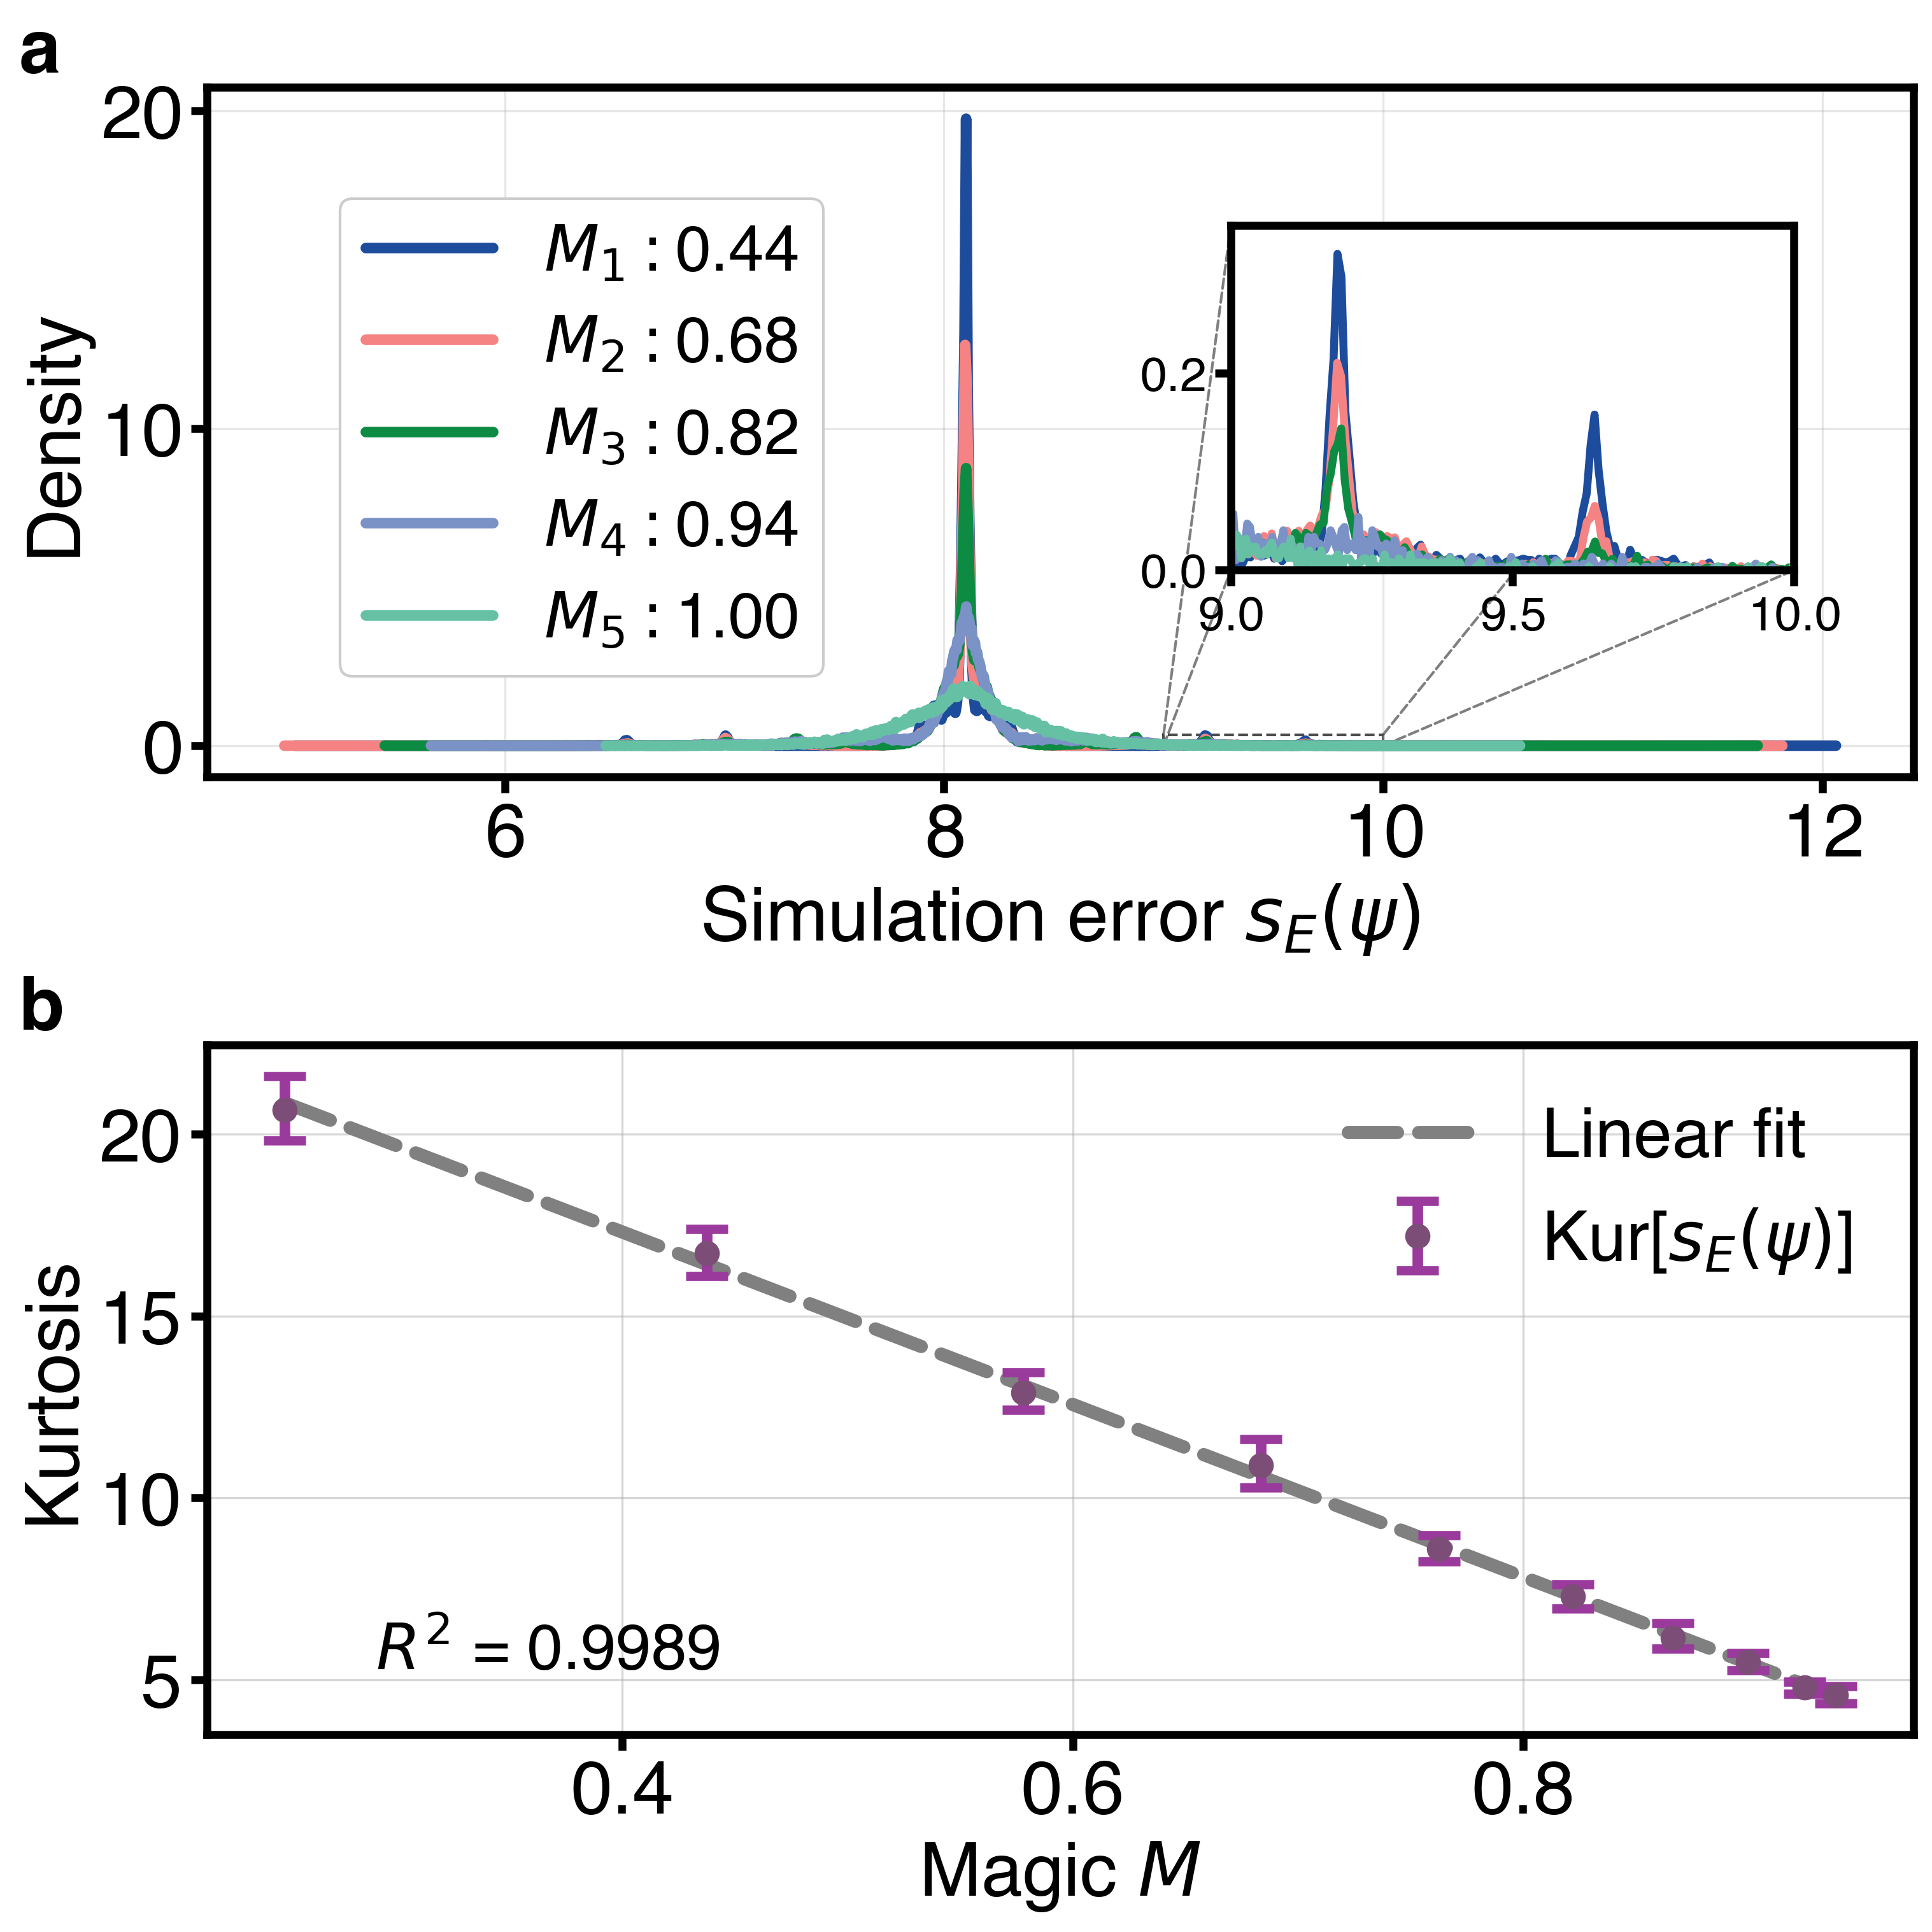

In [14]:

# Create figure with two subplots side by side
fig, (ax_left, ax_right) = plt.subplots(2, 1, figsize=(10,10), layout='constrained')

# ========== LEFT PLOT: DISTRIBUTIONS ==========
ax_left.set_xlabel(r"Simulation error $s_E(\psi)$", fontdict=fontprops)
ax_left.set_ylabel(r"Density", fontdict=fontprops)
# ax_left.spines['bottom'].set_linewidth(2)

i = 0
for j, m in enumerate(magics_dist):
    if j != 3 and j != 5 and j != 6 and j != 7 and j != 8:
        i = i + 1
        errors = np.load(f"./data/magic_10bit{j+1}.npy")
        errors = np.power(errors, 2)*np.power(10,4)
        hists, bins = np.histogram(errors, 1000,density=True)
        ax_left.plot(bins[:-1], np.power(hists, 1), label=rf"$M_{i}:$""{:.2f}".format(magics_dist[j]), linewidth=4, color=colors[j])

ax_left.legend(fontsize=24, bbox_to_anchor=(0.15, 0.1, 0.23, 0.2), framealpha=1)
ax_left.ticklabel_format(style='sci', scilimits=(-2, 2), axis='y',useMathText=True)
ax_left.ticklabel_format(style='sci', scilimits=(-2, 2), axis='x',useMathText=True)
offset_text_left = ax_left.yaxis.get_offset_text()
offset_text_left.set_fontsize(ls-2)
offset_text_left = ax_left.xaxis.get_offset_text()
offset_text_left.set_fontsize(ls-2)
ax_left.tick_params(axis='both', labelsize=ls)
ax_left.grid(alpha=0.3)

# Add inset for zoomed region
zoom_x_min, zoom_x_max = 9, 10
zoom_y_min, zoom_y_max = 0, .35
ax_inset = ax_left.inset_axes([0.6, 0.3, 0.33, 0.5])

inls=18
i = 1
for j, m in enumerate(magics_dist):
    if j != 3 and j != 5 and j != 6 and j != 7 and j != 8:
        errors = np.load(f"./data/magic_10bit{j+1}.npy")
        errors = np.power(errors, 2)*np.power(10,4)
        hists, bins = np.histogram(errors, 1000, density=True)
        ax_inset.plot(bins[:-1], np.power(hists, 1), label=rf'$M_{i}$={round(magics_dist[j], 3)}', linewidth=3, color=colors[j])
        ax_inset.set_xlim(zoom_x_min, zoom_x_max)
        ax_inset.set_ylim(zoom_y_min, zoom_y_max)
ax_inset.tick_params(axis='both', labelsize=inls)
ax_inset.ticklabel_format(style='sci', scilimits=(-2, 2), axis='y',useMathText=True)
ax_inset.ticklabel_format(style='sci', scilimits=(-2, 2), axis='x',useMathText=True)
offset_text_inset_y = ax_inset.yaxis.get_offset_text()
offset_text_inset_y.set_fontsize(inls)
offset_text_inset_x = ax_inset.xaxis.get_offset_text()
offset_text_inset_x.set_fontsize(inls)

# Mark zoomed region on main plot
rect = Rectangle(
    (zoom_x_min, zoom_y_min),
    zoom_x_max - zoom_x_min,
    zoom_y_max - zoom_y_min,
    linewidth=1,
    edgecolor='black',
    facecolor='none',
    linestyle='--',
    alpha=0.7
)
ax_left.add_patch(rect)

# Connection lines
al = 0.5
con1 = ConnectionPatch(xyA=(zoom_x_min, zoom_y_min), xyB=(zoom_x_min, zoom_y_min), 
                       coordsA="data", coordsB="data", axesA=ax_left, axesB=ax_inset,
                       color="black", linestyle="--", alpha=al, linewidth=1)
con2 = ConnectionPatch(xyA=(zoom_x_max, zoom_y_min), xyB=(zoom_x_max, zoom_y_min),
                       coordsA="data", coordsB="data", axesA=ax_left, axesB=ax_inset,
                       color="black", linestyle="--", alpha=al, linewidth=1)
con3 = ConnectionPatch(xyA=(zoom_x_min, zoom_y_max), xyB=(zoom_x_min, zoom_y_max),
                       coordsA="data", coordsB="data", axesA=ax_left, axesB=ax_inset,
                       color="black", linestyle="--", alpha=al, linewidth=1)
con4 = ConnectionPatch(xyA=(zoom_x_max, zoom_y_max), xyB=(zoom_x_max, zoom_y_max),
                       coordsA="data", coordsB="data", axesA=ax_left, axesB=ax_inset,
                       color="black", linestyle="--", alpha=al, linewidth=1)

ax_left.add_artist(con1)
ax_left.add_artist(con2)
ax_left.add_artist(con3)
ax_left.add_artist(con4)

# ========== RIGHT PLOT: KURTOSIS ==========
colors_right = ['#E4A031', '#D68438', '#C76B60', '#B55384', '#7C4D77', '#474769', '#B2B6C1', '#4C7780', '#73A5A2', '#F6E2C1', '#F3DBC1', '#D6E2E2', '#F0EFED', '#E3BBED', '#26445E']

# Fit and plot - EXACTLY as in kurtosis.py
z1 = np.polyfit(magics_kurt, moments, 1)
p1 = np.poly1d(z1)
R_squared = np.corrcoef(moments, p1(magics_kurt))[0,1]**2
print(f"R-squared for kurtosis fit: {R_squared}")
moments_pre = p1(magics_kurt)
ax_right.plot(magics_kurt, moments_pre, "--", color='gray', linewidth=5, label='Linear fit')


ax_right.set_xlabel(r"Magic $M$", fontdict=fontprops)
ax_right.set_ylabel(r"Kurtosis", fontdict=fontprops)
ax_right.tick_params(axis='both', labelsize=ls)
ax_right.grid(True, alpha=0.5)

# Plot points - EXACTLY as in kurtosis.py
# ax_right.plot(magics_kurt, moments, "o", markerfacecolor=colors_right[0], 
#               markeredgecolor=colors_right[4], markersize=12, markeredgewidth=3,label=r'Kur[$s_E(\psi)$]')
ax_right.errorbar(magics_kurt, moments, yerr=np.array(Test_set), fmt='o',linestyle='None',ecolor="#993A9C", 
                  elinewidth=4, capsize=8,linewidth=2,color=colors_right[0],markersize=6, markerfacecolor=colors_right[4],
                  markeredgecolor=colors_right[4],label=r'Kur[$s_E(\psi)$]')
ax_right.legend(loc='best', fontsize=26, framealpha=0)
# Add labels (a) and (b)
for ax, label in zip([ax_left, ax_right], ['a', 'b']):
    ax.text(-0.11, 1.1, label, transform=ax.transAxes, fontsize=28, va='top', weight='bold')
plt.text(0.2, 0.12, rf"$R^2$ = {R_squared:.4f}", ha='center', va='center', transform=ax_right.transAxes, fontsize=24)
plt.savefig('combined_distributions_kurtosis.pdf', bbox_inches='tight', pad_inches=0.1,dpi=200,transparent=True)

Finished!


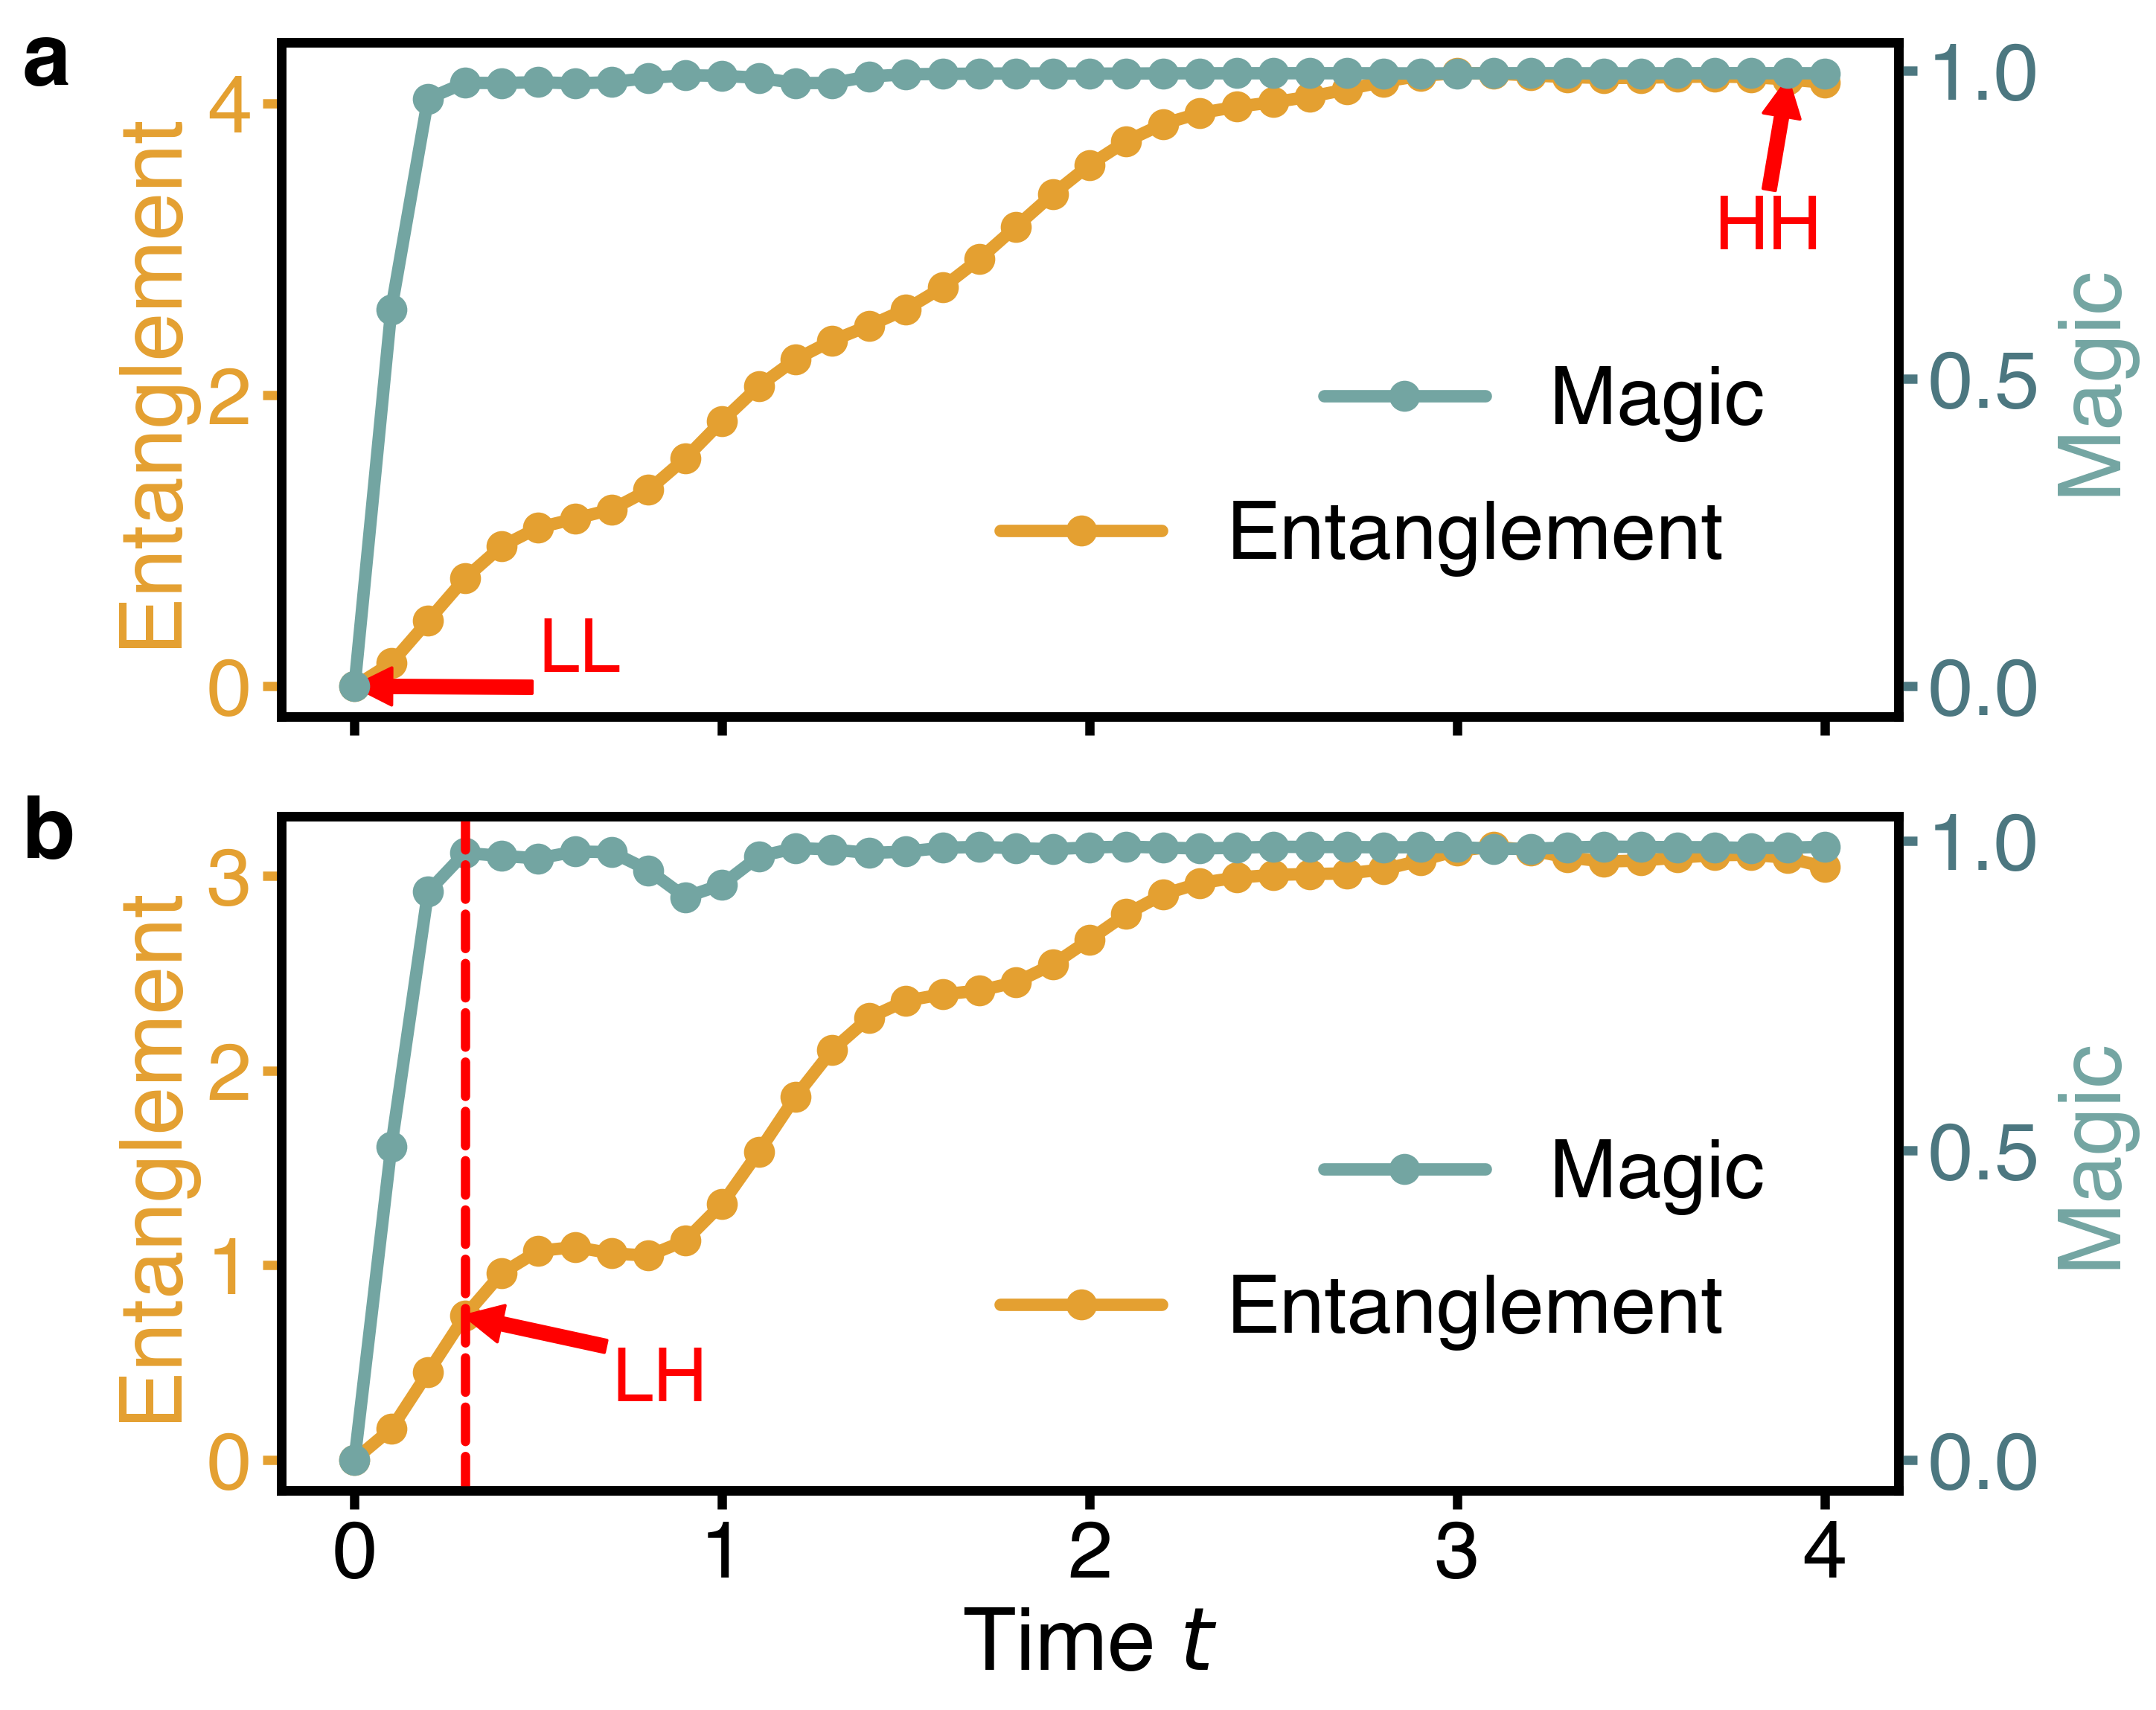

In [15]:
def partEntropy(state, m):
    st = partial_trace(state, list(range(m)))
    return entropy(st,2)

colors = ['#E4A031', '#D68438', '#C76B60', '#B55384', '#7C4D77', '#474769', 
          '#B2B6C1', '#73A5A2', '#4C7780', '#F6E2C1', '#F3DBC1', '#D6E2E2', 
          '#F0EFED', '#E3BBED', '#26445E']

n=10
times=np.linspace(0,4,41)
mas=np.load("./mag_time_data/Tymagics.npy")
amas=np.load("./mag_time_data/Atymagics.npy")
magics=[]
amagics=[]
i=0
while i<41:
    magics.append(mas[i])
    amagics.append(amas[i])
    i+=1
entropies=np.load("./mag_time_data/Tyentropies.npy")
aentropies=np.load("./mag_time_data/Atyentropies.npy")
fontprops = {'size': 28} #axis
ls=26 #legend size
ts=26 #tick size
ms=10 #marks size
mes=0 #marks edge size
lw=4  #linewidth
As=24 #annotation size

#=======Create two subplots========
fig, (ax_up,ax_down) = plt.subplots(2,1,figsize=(10,8),sharex=True)

#typical case
e=0
#ax_up.set_xlabel(r"Time $t$",fontdict=fontprops)
ax_up.set_ylabel(r"Entanglement", fontdict=fontprops, color=colors[e])
ax_up.plot(times,entropies,label="Entanglement",color=colors[e], marker="o", markerfacecolor=colors[e], markeredgecolor=colors[5], markersize=ms, linestyle="-", markeredgewidth=mes, linewidth=lw)
ax_up.ticklabel_format(style='sci', axis='y', scilimits=(-2, 2))
ax_up.tick_params(axis='y', labelsize=ts, colors=colors[e])
ax_up.tick_params(axis='x', labelsize=ts)

ax2=ax_up.twinx()
m=7
ax2.set_ylabel(r"Magic", fontdict=fontprops, color=colors[m])
ax2.tick_params(axis='y', labelsize=ts,colors=colors[m+1])
ax2.plot(times,magics,label="Magic",color=colors[m], marker="o", markerfacecolor=colors[m], markeredgecolor=colors[m+1], markersize=ms, linestyle="-", markeredgewidth=mes, linewidth=lw)

ax_up.legend(loc='lower left', bbox_to_anchor=(0.4, 0.10), fontsize=ls, framealpha=0)
ax2.legend(loc='lower left', bbox_to_anchor=(0.6, 0.30), fontsize=ls, framealpha=0)
#ax_up.set_title(r"(b) Typical", fontsize=ls, pad=20)
ax_up.annotate('LL', xy=(0, 0), xytext=(.5,.1), xycoords='data', fontsize=As, color='red', weight='normal',arrowprops=dict( color='red',shrink=0))
ax_up.annotate('HH', xy=(3.9, entropies[39]), xytext=(3.7,3), xycoords='data', fontsize=As, color='red', weight='normal',arrowprops=dict( color='red',shrink=1))

#Atypical case
e=0
ax_down.set_xlabel(r"Time $t$",fontdict=fontprops)
ax_down.set_ylabel(r"Entanglement", fontdict=fontprops, color=colors[e])
ax_down.plot(times,aentropies,label="Entanglement",color=colors[e], marker="o", markerfacecolor=colors[e], markeredgecolor=colors[5], markersize=ms, linestyle="-", markeredgewidth=mes, linewidth=lw)
ax_down.ticklabel_format(style='sci', axis='y', scilimits=(-2, 2))
ax_down.tick_params(axis='y', labelsize=ts, colors=colors[e])
ax_down.tick_params(axis='x', labelsize=ts)

ax4=ax_down.twinx()
m=7
ax4.set_ylabel(r"Magic", fontdict=fontprops, color=colors[m])
ax4.tick_params(axis='y', labelsize=ts,colors=colors[m+1])
ax4.plot(times,amagics,label="Magic",color=colors[m], marker="o", markerfacecolor=colors[m], markeredgecolor=colors[m+1], markersize=ms, linestyle="-", markeredgewidth=mes, linewidth=lw)

ax_down.legend(loc='lower left', bbox_to_anchor=(0.4, 0.10), fontsize=ls, framealpha=0)
ax4.legend(loc='lower left', bbox_to_anchor=(0.6, 0.30), fontsize=ls, framealpha=0)
ax4.axvline(x=.3, color='red', linestyle='--', linewidth=3)

# Add labels (a) and (b)
for ax, label in zip([ax_up, ax_down], ['a', 'b']):
    ax.text(-.16, 1.03, label, transform=ax.transAxes, fontsize=28, va='top', weight='bold')
ax_down.annotate('LH', xy=(.3, entropies[3]), xytext=(.7,.3), xycoords='data', fontsize=As, color='red', weight='normal',arrowprops=dict( color='red',shrink=1))
piontcolors=['#D2BBD5','#AF76A2','#882E71']

plt.savefig('T_Increase.pdf', 
            bbox_inches='tight',  # 紧贴内容
            pad_inches=0.1,         # 无额外填充
            dpi=1200000,              # 高分辨率
            transparent=True)     # 透明背景
print("Finished!")

74555 74555 74555


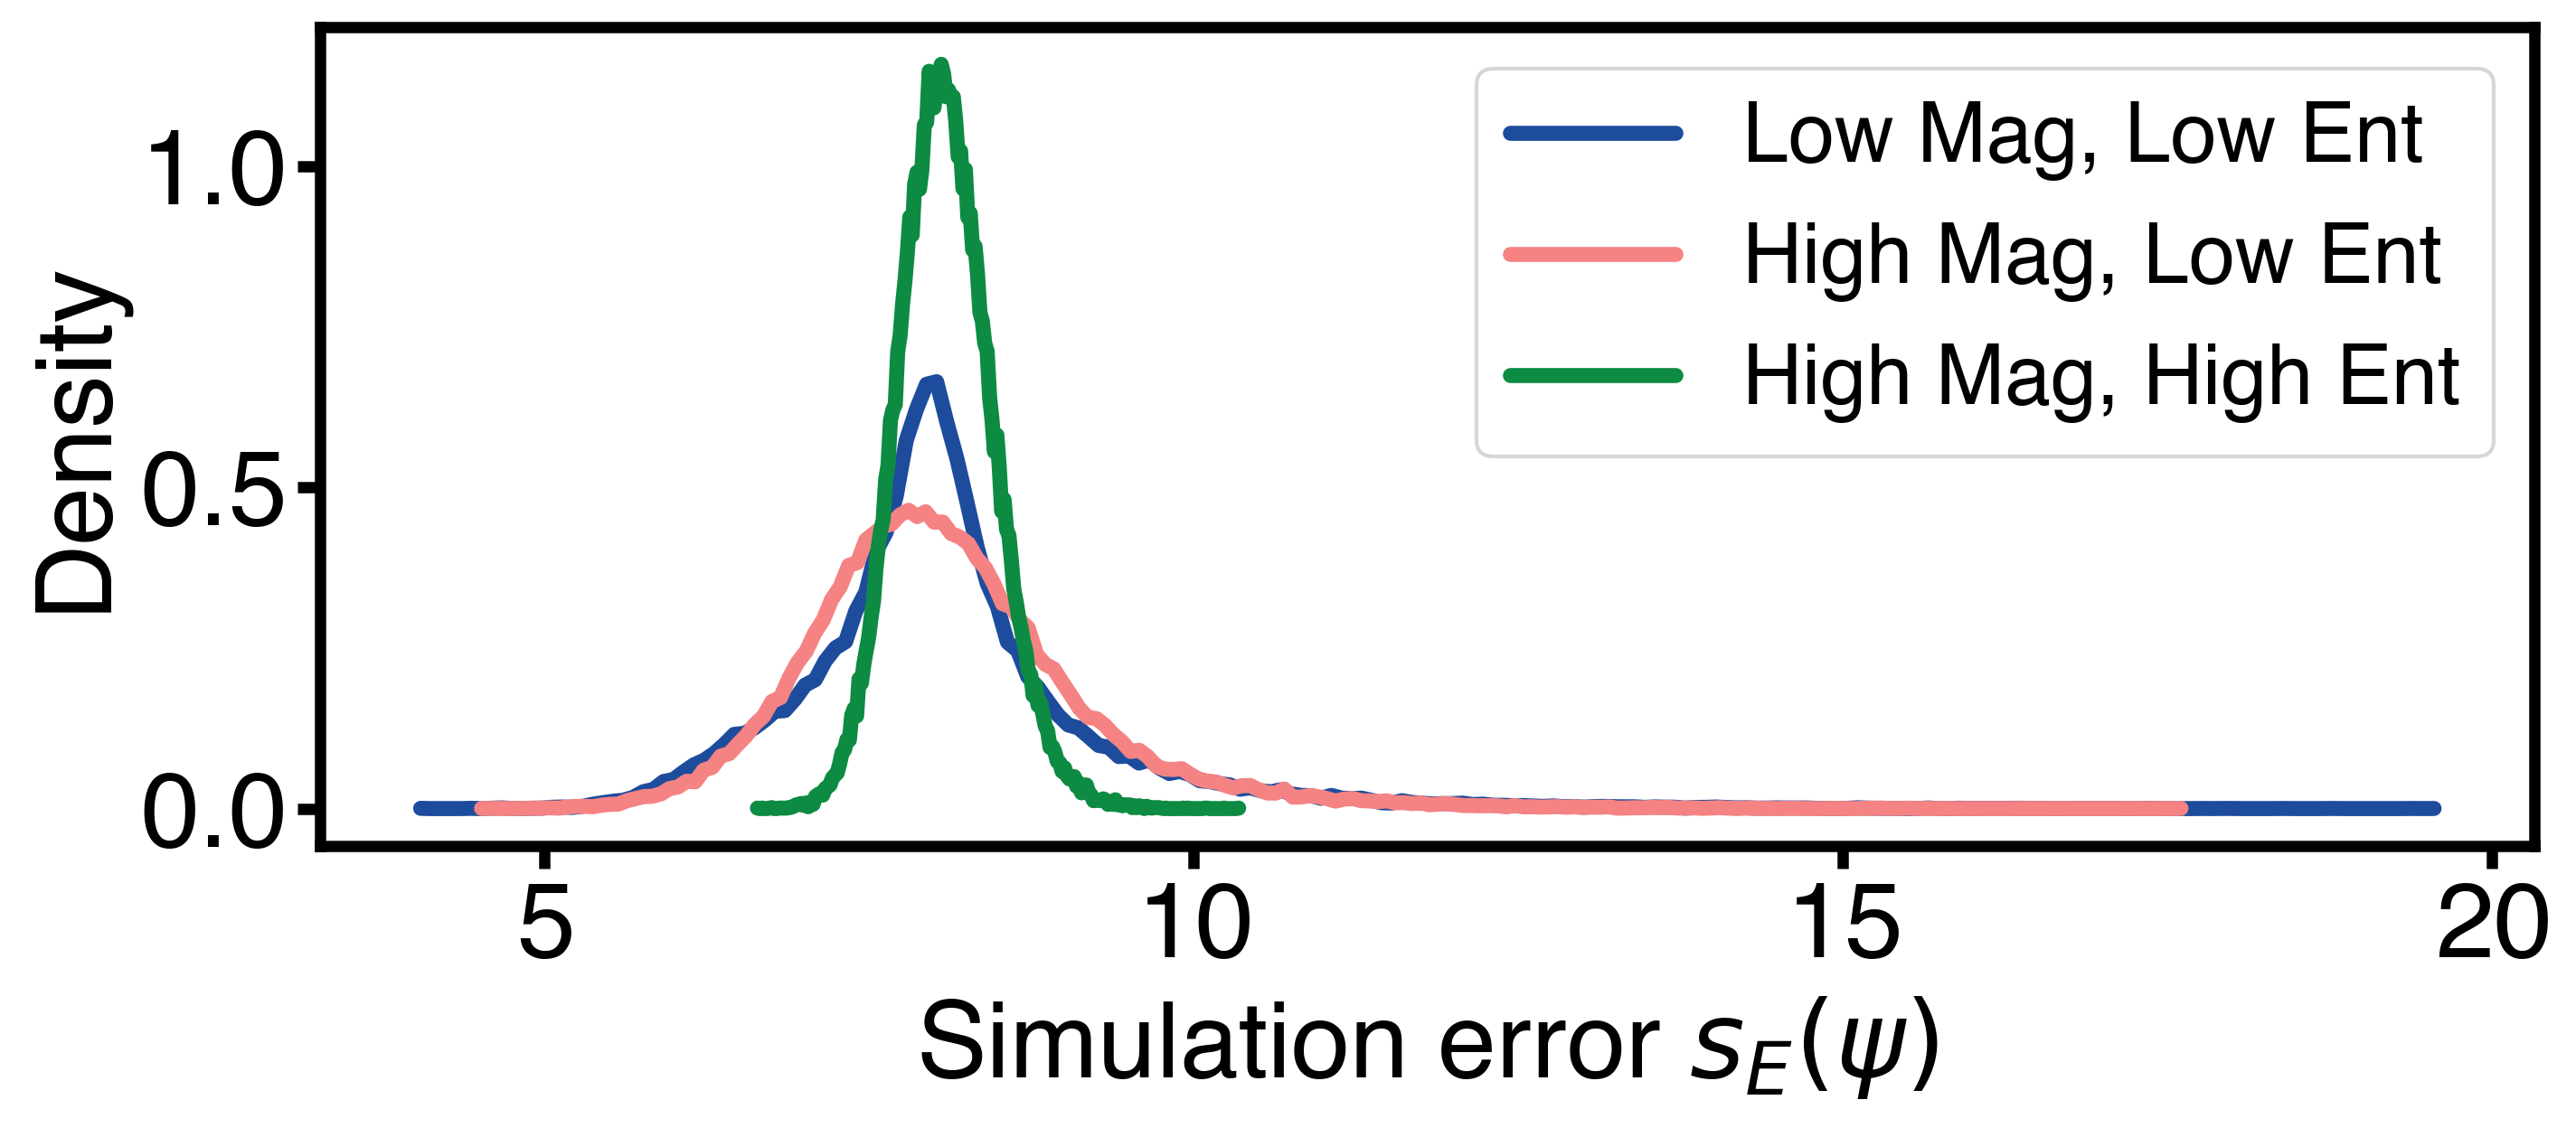

In [16]:
# # Plot three distributions
lowmag_lowent_error=np.load("./newdata/lowmag_lowent_error.npy").tolist()
highmag_lowent_error=np.load("./newdata/highmag_lowent_error.npy").tolist()
highmag_highent_error=np.load("./newdata/highmag_highent_error.npy").tolist()
del lowmag_lowent_error[74554:-1]
del highmag_lowent_error[74554:-1]
del highmag_highent_error[74554:-1]
lowmag_lowent_error=np.power(lowmag_lowent_error,2)
highmag_lowent_error=np.power(highmag_lowent_error,2)
highmag_highent_error=np.power(highmag_highent_error,2)
print(len(lowmag_lowent_error),len(highmag_lowent_error),len(highmag_highent_error))
fig, ax=plt.subplots(figsize=(10,4.5))
ls = 28
les = 22
fontprops = {'size': 28}
labels=['Low Mag, Low Ent','High Mag, Low Ent','High Mag, High Ent']
colors = ['#1E4C9C', '#F58383', '#0D8B43', '#ECAC27', '#7B92C7', '#FB8C62', '#B0DC66', '#8C9FCA', '#C9C780', '#66C1A4', '#FCB2AF', '#9BDFDF', '#FFE2CE', '#C4D8E9', '#BEBCDF', '#4C9BE6', '#B2B6C1', '#4C7780', '#73A5A2', '#F6E2C1', '#F3DBC1', '#D6E2E2', '#F0EFED', '#E3BBED', '#26445E']
for j,error in enumerate([lowmag_lowent_error,highmag_lowent_error,highmag_highent_error]):
    hists, bins = np.histogram(error*np.power(10,4), 200,density=True)
    ax.plot(bins[:-1], np.power(hists, 1), linewidth=4, color=colors[j],label=labels[j])
ax.set_xlabel(r"Simulation error $s_E(\psi)$",fontsize=ls)
ax.set_ylabel("Density",fontsize=ls)
ax.tick_params(axis='both', which='major', labelsize=ls)
ax.ticklabel_format(axis='both', style='sci', scilimits=(0,2), useMathText=True)
ax.legend(loc='best',fontsize=les)
plt.savefig('3distributions.pdf', bbox_inches='tight', pad_inches=0.1,dpi=200,transparent=True)